In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import numpy as np
#%matplotlib ipympl

# Monetary rules extension - Monetary policy laboratory

Written by Lucas Soares November, 2022
Last modified by Lucas Soares November, 2022
                                                    
                                                    README



The folllowing script is composed by two parts and divided in 13 cells

            INDEX
            First Part:
   ->  Cells 1-5: are routine cells the user should run all of them before starting the observe the outcomes, they are setting the initial condition of the parameters, calculating the initial condition of the variables and definig the plotting funcitons. 

The flow is the following: Initial conditional of the parameters are set in cell 1 and they define initial conditions of the variables and steady states, the former through function arguments at cell 2 and the latter directly in funcion f1 at cell 3. Cell 3 takes as arguments the array 'param' from cell 1 standing for the parameters and the array 'pararg' from cell 2 containing the initial conditions of the system. the function defined in cell 3 gives as outputs the same variables that will be substituted in the initial condition to iterated the system in cell 6 and 7

-> Cells 6-7: these are the scripts to run the model. They take have user interactive entries on the top left and they iterate the function f1 from cell 3 from its initial conditions up to the defined number of periods, the output is the graph defined in cell 5. Cell 7 is a variation on it
            
            Second Part:
-> Cell 8 simply defines the funciton used to plot the graphs of the second part and cell 9 and 10 are scripts of algorithms implemented. Cell 9 is analogous to cell 6 in the sense that they iterate the dynamic system from its initial conditions, the difference is that in cell 9 the user is allowed to observe how each monetary rule react to a shock on investment, the size of the shock is changed for each economy according the user specifications and the monetary rule type is also open for choice. Cell 10 is a variation like cell 7 is on 6, just adds the AR(1) persistent shock to the analysis. The ouputs of these scripts are the graphs plotted by the function defined in cell 8.

-> Cell 11 should be used carefully, it allows for parametric variation. The user can observe time series for diferent economies in terms of parameters. First the user chooses the shock (it will be the same in this case for all economies) the the user chooses which and how a parameter should be disturbed. For example, checking how an economy with a higher parametric wage share accomodates the same shock in investment when compared with a lower wage share economy. This cell is subject to overflows if the user deviates too far from the equilibrium. The outcome of this cell are the graphs of the time series for different economies.

-> Cells 12 and 13: Thesse are cells defining plotting funcitons and plotting, cell 12 is a phase diagram for given variables described there (changing the variables displayed should not be difficult) however this cell is not very compatible with te script from cell 11. This cell will plot the phase diagrams correspondent to the last simulation ran however the function might be called in ny other cell of the code it is defined. Cell 13 is defining and plotting bifurcation diagrams, this was specially thought to be combined with cell 11, so if the user calls the graphs from the funciton defined on cell 13 without running cell 11 the graphs will not be informative. This cell assumes cell 11 was ran before it.

GENERAL ADVICES: In case of problems with the code we suggest rerun the first cells (1-3) in order to reset the basic environment of the model. We suggest to be careful when changing pieces of the code which are not user interactive, and in case of problems please contact the authors.

CELL #1 - Setting the initial values of parameters

In [2]:
# Cell of parameters
nI = 0.15
nII = 0.35
u_star = 0.04
sigmaI = 0.05 
sigmaII = 0.15
omega = 0.8
tau = 0.0075
r_star = 0.0025
pi_star = 0.005
beta1 = 0.5
beta2 = 0.5
gamma = 0.9
phi = 0.5
param = np.array([nI,nII,u_star,sigmaI,sigmaII,omega,tau,r_star,pi_star,beta1,beta2,gamma,phi])

#arguments(param)

## CELL #2 = Defining initial conditions of variables, recall that in order to start the model at equilibrium the initial conditions must be set on the steady states of the variables and they depend on the parameters, that is wahy we define them through a function

In [3]:
#Initial values and preallocating initial array
def arguments(param):
    
    nI,nII,u_star,sigmaI,sigmaII,omega,tau,r_star,pi_star,beta1,beta2,gamma,phi = param
    
    def adjust(omega,phi):
        lambdaI = omega*phi
        lambdaII = omega*(1-phi)
        return lambdaI,lambdaII
    
    lambdaI = adjust(omega,phi)[0]
    lambdaII = adjust(omega,phi)[1]
    

    #Initial conditions
    g = tau 
    R_star = ((1 + r_star)* (1 + pi_star)) - 1 #Starting at the steady state value
    pi = pi_star
    i = 1 + tau - lambdaI* (1 + tau) - lambdaII #Starting at the steady state value
    d = ((i - (1 - omega)* (1 + tau))*(1+pi_star)/ ((1+tau)*(1+pi_star) -1 - R_star)) #Starting at the steady state value
    u = u_star
    r = r_star
    R = R_star
    
    #auxiliary (lagged) variables
    u_II = u_star
    
    pi_II = pi_star
    pi_III = pi_star
    pi_IV = pi_star
    
    r_II = r_star
    r_III = r_star
    r_IV = r_star
    r_V = r_star
    r_VI = r_star
    r_VII = r_star
    r_VIII = r_star
    r_IX = r_star
    
    yexp = 1 #Keeping track of the output level for output original Taylor rule and comparing graphs

    #Creating the entring array to be iterated by the dynamic system
    pararg = np.array([d,R,pi,i,g,u,u_II,pi_II,pi_III,pi_IV,r,r_II,r_III,r_IV,r_V,r_VI,r_VII,r_VIII,r_IX,yexp])
    
    return pararg

CELL #3 - The core of the model, this cell states the dynamic system which will be iterated

In [4]:
#Defining dynamic system of the model
def f1 (args,param,k,mrtype):
    
    d,R,pi,i,g,u,u_II,pi_II,pi_III,pi_IV,r,r_II,r_III,r_IV,r_V,r_VI,r_VII,r_VIII,r_IX,yexp = args
    nI,nII,u_star,sigmaI,sigmaII,omega,tau,r_star,pi_star,beta1,beta2,gamma,phi = param
    
    #Adressing the fact that psichological law of comsumption must be consistent with wage share
    def adjust(omega):
        lambdaI = omega*(phi)
        lambdaII = omega*(1-phi)
        return lambdaI,lambdaII
    
    lambdaI = adjust(omega)[0]
    lambdaII = adjust(omega)[1]
    
    
    
    
    #STEADY STATE VALUES
    g_star = tau

    i_star = 1 + g_star - lambdaI* (1 + g_star) - lambdaII

    #d_star = ((i_star - (1 - omega)* (1 + g_star))/ (g_star - (r_star)))

    R_star = (((1 + r_star)* (1 + pi_star)) - 1) 
    
    d_star = ((i_star - (1 - omega)* (1 + tau))*(1+pi_star)/ ((1+tau)*(1+pi_star) -1 - R_star))
    
    nO = i_star - nI* g_star - nII* (1 + g_star)* (1 - omega) + nII* d_star* (R_star/ (1 + pi_star))
    
    
    
    
    #DYNAMIC EQUATIONS
    
    #Debt and inflation are defined when the period starts
    d1 = ((1 + R)/ ((1 + g)* (1 + pi)))* d + (i/ (1 + g)) - (1 - omega)
    
    a = ((1 + tau)* (1 + pi - sigmaI* (u - u_star) - sigmaII* (u - u_II))) - 1

    pi1 = ((a + 1)/ (1 + tau)) - 1
    
    #Monetary authority observes inflation and acts based on a forward looking monetary rule
    
    if ttr == 1:
        pi_obs = (pi1+pi+pi_II+pi_III)/4     #If clause to enable TTR (Taylor Traditional Rule)
    else:
        pi_obs = pi1
    
    
    #Defining the type of monetary rule implemented
    yexp = yexp*(1+g) #Keeping track of the output level
    
    if mrtype == 5:
        r1 = r_star + beta1*(pi_obs - pi_star) + beta2*(0.6 - d1)
    elif mrtype == 4:            #No monetary rule, original setting 
        r1 = r
        
    elif mrtype == 0:
        r1 = r_star + beta1*(pi_obs-pi_star) + beta2*((yexp)-(1+tau)**(k+1))/((1+tau)**(k+1)) #Taylor traditional rule aiming output level of equilibrium
        
    elif mrtype == 1:          #Monetary rule aiming output equilibrium growth rate
        r1 = r_star + beta1*(pi_obs-pi_star) + beta2*((g-tau)/(1+tau))  
        
    elif mrtype == 2 or 3:
        if mrtype == 2:         #Monetary rule aiming level of unemployment
            u_target = u_star   #Aiming equilibrium level
        elif mrtype == 3:
            u_target = 0        #Aiming full employment (check the file oreiro.ipynb for another specification)
        r1 = r_star + beta1*(pi1-pi_star) + beta2*(u_target -(tau - g +u*(1+g)/(1+tau))) #Specification of the rule
    
    
    #Interest rate smoothing
    if smooth == 1:
        r1 = gamma*args[10+delay] + (1-gamma)*r1
    
    #Defining the number of lags the transmission mechanisnm is subject to
    if delay == 0:
        irate = r1
    else:
        irate = args[9+delay]
    
    #if smooth == 1:
     #   irate = gamma*args[8+delay] + (1-gamma)*irate
    
    #Real interest rate is transmitted to nominal interest rates  
    R1 = max((1 + irate)* (1 + pi) - 1,0)
    
    #if smooth == 1:
     #   R1 = gamma*R + (1-gamma)*R1
    
    #Enterpreneurs observe output growth, nominal interest rates and inflation. They pay the debt and choose investment levels 
    i1 =  nO + nI* g + nII* (1 - omega)* (1 + g) - nII* ((R1* d1)/ (1 + pi1)) 
    
    #Demand determines output
    g1 = i1 + lambdaI* (1 + g) + lambdaII - 1
    
    #Output pushes employment
    l = 1 - u
    b = l* ((1 + g1)/(1 + tau))
    
    #If the economy is at full employment, output cannot increase more than productivity and the flow of resources from investment become inflation
    u1 = max(1 - b,0)
    
    if u1 == 0: #If investment pulls the economy beyond full employment, g does not represent real output gowth we have to decompose it
        if g1 > tau:
            pi1 = pi1 + g1 - tau #Share of increase in g which is pure inflation    
        g1 = min(tau,g1)         #Share of increase in g which is real output growth
    
    
    
    
    #AUXILIARY VARIABLES
    u_II1 = u 
    
    pi_II1 = pi
    
    pi_III1 = pi_II
    
    pi_IV1 = pi_III
    
    r_II1 = r
    
    r_III1 = r_II
    
    r_IV1 = r_III
    
    r_V1 = r_IV
    
    r_VI1 = r_V
    
    r_VII1 = r_VI
    
    r_VIII1 = r_VII
    
    r_IX1 = r_VIII

    return [d1, R1, pi1, i1, g1, u1, u_II1, pi_II1, pi_III1, pi_IV1, r1, r_II1, r_III1, r_IV1, r_V1,r_VI1,r_VII1,r_VIII1,r_IX,yexp]

In [5]:
arguments(param)

array([0.6      , 0.0075125, 0.005    , 0.2045   , 0.0075   , 0.04     ,
       0.04     , 0.005    , 0.005    , 0.005    , 0.0025   , 0.0025   ,
       0.0025   , 0.0025   , 0.0025   , 0.0025   , 0.0025   , 0.0025   ,
       0.0025   , 1.       ])

CELL #5 - Function to plot the graphs of the first part

In [6]:
def graphs(output):
    
    plt.figure(1,figsize=(12,15))
    a11 = plt.subplot(421)
    a11.plot(output[:,0])
    a11.set_title('Debt to income')
    
    a12 = plt.subplot(422) 
    a12.plot(output[:,3])
    a12.set_title('Investiment to income')
    
    a21 = plt.subplot(423)
    a21.plot(output[:,4])
    a21.set_title('Output growth rate')
    
    a22 = plt.subplot(424)
    a22.plot(output[:,5])
    a22.set_title('Unemployment')
    
    a31 = plt.subplot(425)
    a31.plot(output[:,1])
    a31.set_title('Nominal interest rate')
    
    a32 = plt.subplot(426)
    a32.plot(output[:,2])
    a32.set_title('Inflation')
    #a4 = plt.subplot(414)    
    #a4.plot(output[:,16])
    #a4.set_title('Output level trajectory (10 last periods)')
    
    plt.plot()
    
    #Getting statistics

    print('Statistics')
    print()
    print(f"Output level at last period {output[-1,16]}")
    print()

    print(f"Debt                   mean = {np.mean(output[:,0])};  std = {np.std(output[:,0])}")
    print(f"Nominal int. rate      mean = {np.mean(output[:,1])};  std = {np.std(output[:,1])}")
    print(f"Inflation              mean = {np.mean(output[:,2])};  std = {np.std(output[:,2])}")
    print(f"Investment             mean = {np.mean(output[:,3])};  std = {np.std(output[:,3])}")
    print(f"Output growth          mean = {np.mean(output[:,4])};  std = {np.std(output[:,4])}")
    print(f"Unemployment           mean = {np.mean(output[:,5])};  std = {np.std(output[:,5])}")
    return

In [6]:
def graphs(output):
    

    a11 = plt.subplot(421)
    a11.plot(output[:,0])
    a11.set_title('Debt to income')
    a12 = plt.subplot(422) 
    a12.plot(output[:,3])
    a12.set_title('Investiment to income')
    a21 = plt.subplot(423)
    a21.plot(output[:,4])
    a21.set_title('Output growth rate')
    a22 = plt.subplot(424)
    a22.plot(output[:,5])
    a22.set_title('Unemployment')
    a31 = plt.subplot(425)
    a31.plot(output[:,1])
    a31.set_title('Nominal interest rate')
    a32 = plt.subplot(426)
    a32.plot(output[:,2])
    a32.set_title('Inflation')
    #a4 = plt.subplot(414)    
    #a4.plot(output[:,16])
    #a4.set_title('Output level trajectory (10 last periods)')
    plt.plot()
    return

CELL #6 - Script to iterate the dynamic system through the phase plane given the deviation from equilibrium (shock on investment), the number of periods simulated and the type of monetary rule chosen. User interactive choices are on the first row 

4
Statistics

Output level at last period 0.0025

Debt                   mean = 0.5991451285707184;  std = 0.0020300320694450424
Nominal int. rate      mean = 0.007766949747152526;  std = 0.0018170221554893353
Inflation              mean = 0.005232335742920063;  std = 0.001828158565873319
Investment             mean = 0.20444751000827235;  std = 0.0005735716999272952
Output growth          mean = 0.007440573852332613;  std = 0.0009899453017991448
Unemployment           mean = 0.04030055558674327;  std = 0.005366737122812538


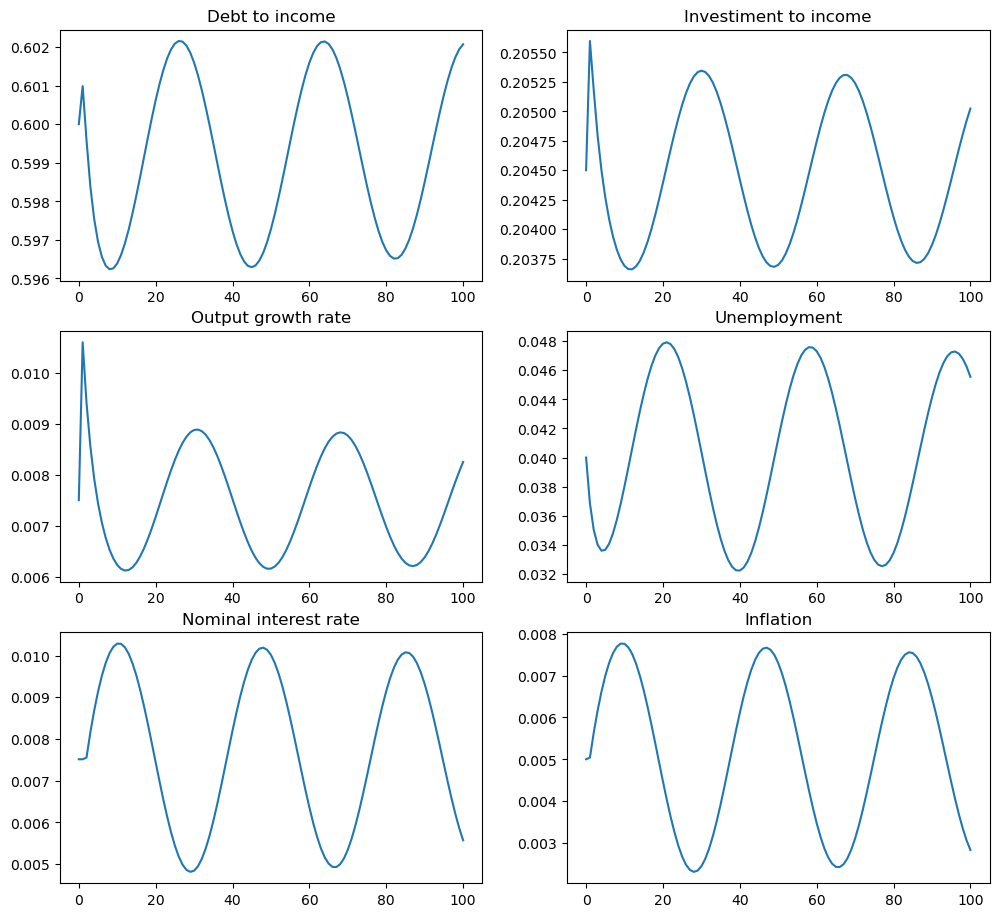

In [9]:
#Iterating simplest version

for i in [4]:
############################################################################################################################
################################################  USER CHOICES  ############################################################
    
    shock = 0.005     #chose the size of the shock in investment

    nperiods = 100    #chose the number of periods to be simulated

    delay = 1         #Number of time lags of the monatary policy max(6)

    mrtype = i        #Chose the variable targetted by the monetary authority; 0 = equilibrium level of output
    print(mrtype)     #1 = equilibrium output growth rate, 2 = equilibrium employment level, 3 = full employment, 4 - No MR

    ttr = 0           #if =1 inflation in the monetary rule is an average of the 4 last ones (Taylor 1993), 
                      #if =0 is just the current inflation


    smooth = 0       #Activating the smoothing interest rule
#############################################################################################################################
#############################################  ITERATOR  FUNCTION  ##########################################################

#Calculating shock on unemployment
    shock_u = -u_star*(shock/(1+tau))

    k=0
    output = np.array(arguments(param)) #Array to store results
    result = np.array(arguments(param)) #Array to iterate over
    #result = np.array(ak)
    result[3] = result[3]+shock #Shock in investment
    result[4] = result[4]+shock #the shock is transferred to output the same period because of the timing of the model
    result[5] = result[5]+shock_u #Shock in unemployment
    for k in range(nperiods): #Number of periods
        result = f1(result,param,k,mrtype)
        output = np.vstack((output,result))
        k += 1
    
    graphs(output)  #Calling graphs


CELL #7 - Same as previous cell with the additional AR(1) that might be enabled through the rho variable

In [220]:
ak = np.array(result)
ak[16]  = 1
ak

array([ 0.14464372,  0.0324433 ,  0.04629692,  0.2045    ,  0.0075    ,
        0.04      ,  0.04      ,  0.04629692,  0.04629692,  0.04629692,
       -0.01324062, -0.01324062, -0.01324062, -0.01324062, -0.01324062,
       -0.01324062,  1.        ])

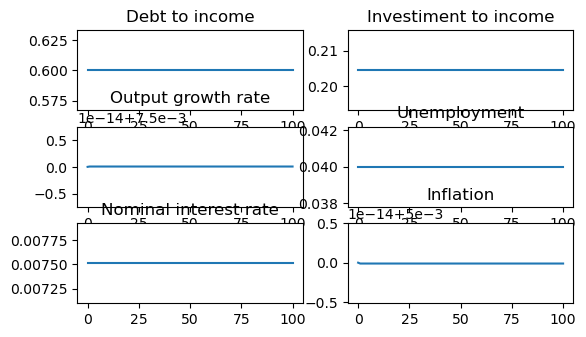

In [21]:
#Including a shock AR(1) in the original version

############################################################################################################################
################################################  USER CHOICES  ############################################################

shock = 0.00     #chose the size of the shock in investment

nperiods = 100    #chose the number of periods to be simulated

delay = 0         #Number of time lags of the monatary policy max(6)

mrtype = 4        #Chose the variable targetted by the monetary authority; 0 = equilibrium level of output target,
                  # 1 = equilibrium output growth rate target, 2 = equilibrium employment level target, 3 = full employment

ttr = 0           #if =1 inflation in the monetary rule is an average of the 4 last ones (Taylor 1993), if =0 is just the current inflation

rho = 0.5         #Choose the persistance shock parameter
#############################################################################################################################
#############################################  ITERATOR  FUNCTION  ##########################################################

output = np.array(arguments(param))  #Preallocating array to store results
result = np.array(arguments(param))  #Setting initial conditions (function of parameters)

k=0
for k in range(nperiods):
    shock_u = -result[6]*(shock/(1+tau))
    
    result[3] = result[3]+shock
    result[4] = result[4]+shock #the shock is transferred to output the same period because of the timing of the model
    result[5] = result[5]+shock_u
    shock = rho*shock
    result = f1(result,param,k,mrtype)
    output = np.vstack((output,result))
    k += 1
    
graphs(output)

# Second part - full analysis

In this section the user is allowed to evaluate how different shocks affects this economy in all the possible instances of it using an efficient algorithm of research (different monetary rules in action and different parametric combination)

CELL #8 - Function to plot the graphs of the second part, the user should start by running it

In [9]:
#Function to plot second set of graphs
def graphs2(output,i):
    
    plt.figure(1,figsize=(15,15))
    a11 = plt.subplot(421)
    a11.plot(output[i:,0,1:])
    a11.set_title('Debt to income')
    a12 = plt.subplot(422) 
    a12.plot(output[i:,3,1:])
    a12.set_title('Investiment to income')
    a21 = plt.subplot(423)
    a21.plot(output[i:,4,1:])
    a21.set_title('Output growth rate')
    a22 = plt.subplot(424)
    a22.plot(output[i:,5,1:])
    a22.set_title('Unemployment')
    a31 = plt.subplot(425)
    a31.plot(output[i:,1,1:])
    a31.set_title('Nominal interest rate')
    a32 = plt.subplot(426)
    a32.plot(output[i:,2,1:])
    a32.set_title('Inflation')
    a4 = plt.subplot(414)    
    a4.plot(output[i+nperiods-10:,16,1:])
    a4.set_title('Output level trajectory (10 last periods)')
    
    print('Statistics')
    print()
    print(f"Output level at last period {output[i+nperiods,16,1:]}")
    print()

    print(f"Debt                   mean = {np.mean(output[i:,0,1:])};  std = {np.std(output[i:,0,1:])}")
    print(f"Nominal int. rate      mean = {np.mean(output[i:,1,1:])};  std = {np.std(output[i:,1,1:])}")
    print(f"Inflation              mean = {np.mean(output[i:,2,1:])};  std = {np.std(output[i:,2,1:])}")
    print(f"Investment             mean = {np.mean(output[i:,3,1:])};  std = {np.std(output[i:,3,1:])}")
    print(f"Output growth          mean = {np.mean(output[i:,4,1:])};  std = {np.std(output[i:,4,1:])}")
    print(f"Unemployment           mean = {np.mean(output[i:,5,1:])};  std = {np.std(output[i:,5,1:])}")
    
    return

CELL #9 - Script that allows for evaluation of effectviveness of different monetary rules specifications under different shocks on investment

Statistics

Output level at last period [0.0025 0.0025 0.0025 0.0025]

Debt                   mean = 0.5994892533503016;  std = 0.0017809385398911447
Nominal int. rate      mean = 0.007576197051911791;  std = 0.0016049804868941283
Inflation              mean = 0.0050594509445238914;  std = 0.0016032256137903586
Investment             mean = 0.20448980490310825;  std = 0.0005003362396134368
Output growth          mean = 0.007490308498907721;  std = 0.0008352317295098094
Unemployment           mean = 0.04005981435270303;  std = 0.004647130519476407


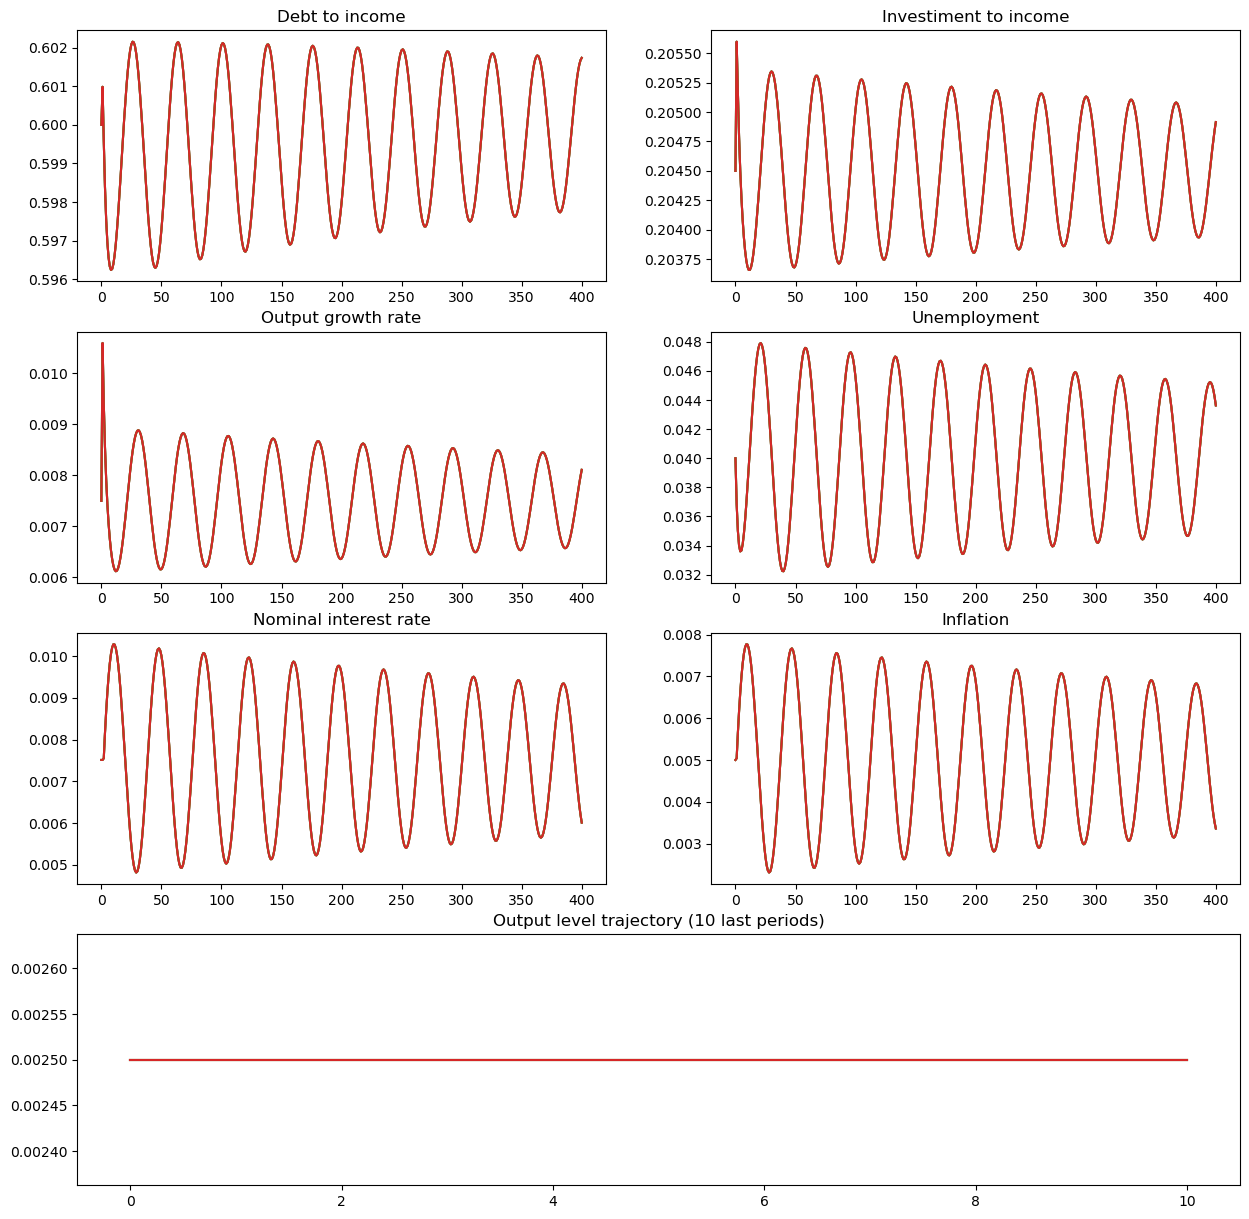

In [17]:
#Parametric/shock exploration


############################################################################################################################
################################################  USER CHOICES  ############################################################

shock = 0.005    #chose the size of the shock in investment

nperiods = 400    #chose the number of periods to be simulated

delay = 4         #Number of time lags of the monatary policy max(6)

mrtype = 4        #Chose the variable targetted by the monetary authority; 0 = equilibrium level of output target,
                  # 1 = equilibrium output growth rate target, 2 = equilibrium employment level target, 3 = full employment

ttr = 1           #if =1 inflation in the monetary rule is an average of the 4 last ones (Taylor 1993), if =0 is just the current inflation

smooth = 0

############################################  SECOND SET OF CHOICES  #######################################################

#r = 0.0025 #easily setting parameter back to initial value without need to rerun cell of parameters

nsims = 4                #number of different economies to be simulated min(1)
perturbation = 0.00     #size of perturbation in each different economy
transiency =   0         #transiency period (OPTIONAL)
perturbation2 = 0.0    #size of pertubartion on the interest rate, if it is zero is disabled (OPTIONAL)

#r = r + perturbation2   #parameter under the perturbation of the variable above



############################################################################################################################

#############################################################################################################################
#############################################  ITERATOR  FUNCTION  ##########################################################
test = np.array(arguments(param))
output = np.zeros((transiency+nperiods+1,20,1))  #preallocating final array to store all the results
shock_u = -u_star*(shock/(1+tau))

for j in range(nsims):
    results = np.array(arguments(param)) #Array to store results
    #results = np.array(ak)
    local = np.array(results) #np.array(arguments(param)) #Initial condition to be iterated over
    local[3] = local[3]+shock
    local[4] = local[4]+shock #shock is transferred to output the same period because of the time specification of the model
    local[5] = local[5]+shock_u
    k=0  #Iteration counter set to zero when we start the outter loop to begin a new simulation for a different economy
    for k in range(nperiods+transiency): #Number of periods
        
        local = f1(local,param,k,mrtype)
        results = np.vstack((results,local))
   
    output = np.dstack((output,results))   #Storing results of each initial state
    shock = shock + perturbation           #Changing the initial state

graphs2(output,transiency)

In [321]:
meanresult = np.mean(output[nperiods+transiency:,:,:],0)

    
    
print('Statistics')
print()
print(f"Output level at last period {np.mean(output[nperiods+transiency,-1,:])}")
print()

print(f"Debt                   mean = {np.mean(meanresult[0,1:])};  std = {np.std(meanresult[0,1:])/0.0025}")
print(f"Nominal int. rate      mean = {np.mean(((meanresult[1,1:]+1)**4)-1)};  std = {np.std(((meanresult[1,1:]+1)**4)-1)/0.0025}")
print(f"Inflation              mean = {np.mean(((meanresult[2,1:]+1)**4)-1)};  std = {np.std(((meanresult[2,1:]+1)**4)-1)/0.0025}")
print(f"Investment             mean = {np.mean(meanresult[3,1:])};  std = {np.std(meanresult[3,1:])/0.0025}")
print(f"Output growth          mean = {np.mean(((meanresult[4,1:]+1)**4)-1)};  std = {np.std(((meanresult[4,1:]+1)**4)-1)/0.0025}")
print(f"Unemployment           mean = {np.mean(meanresult[5,1:])};  std = {np.std(meanresult[5,1:])/0.0025}")
    

Statistics

Output level at last period nan

Debt                   mean = nan;  std = nan
Nominal int. rate      mean = nan;  std = nan
Inflation              mean = nan;  std = nan
Investment             mean = nan;  std = nan
Output growth          mean = nan;  std = nan
Unemployment           mean = nan;  std = nan


CELL #10 - Same as before but now with the AR(1) component that might be activated

Statistics

Output level at last period [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan na

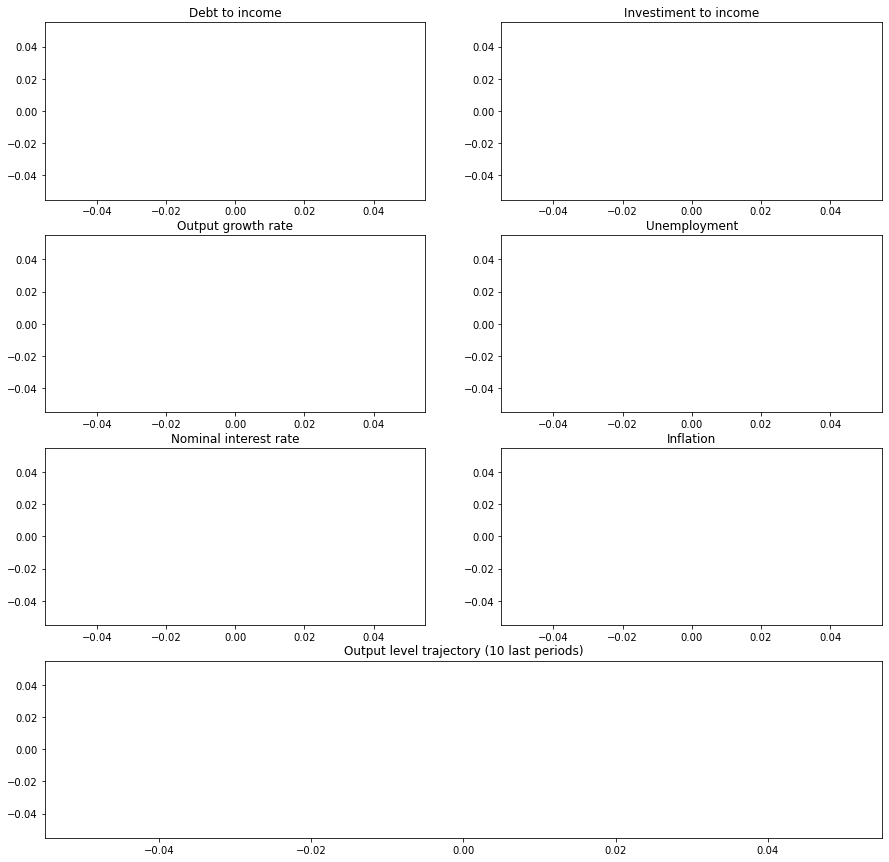

In [329]:
#Parametric/shock exploration with AR(1) shock in investment (DEMAND SHOCK)

############################################################################################################################
################################################  USER CHOICES  ############################################################
np.random.seed(1)
shock = 0.00     #Choose the size of the shock in investment

nperiods = 100    #Choose the number of periods to be simulated

delay = 5         #Number of time lags of the monatary policy max(5)

mrtype = 3        #Choose the variable targetted by the monetary authority; 0 = equilibrium level of output target,
                  # 1 = equilibrium output growth rate target, 2 = equilibrium employment level target, 3 = full employment

ttr = 1           #if =1 inflation in the monetary rule is an average of the 4 last ones (Taylor 1993), if =0 is just the current inflation

rho = 0        #Choose the value of AR(1) persistence parameter. If zero feature is disabled

smooth = 0
############################################  SECOND SET OF CHOICES  #######################################################

#r = 0.0025 #easily setting parameter back to initial value without need to rerun cell of parameters

nsims = 1000                #number of different economies to be simulated min(1)
perturbation = 0.00     #size of perturbation in each different economy
transiency =   100         #transiency period (OPTIONAL)
perturbation2 = 0.0     #size of pertubartion on the interest rate, if it is zero is disabled (OPTIONAL)

#r = r + perturbation2   #parameter under the perturbation of the variable above

############################################################################################################################


#############################################################################################################################
#############################################  ITERATOR  FUNCTION  #########################################################

output = np.zeros((transiency+nperiods+1,17,1))  #preallocating final array


for j in range(nsims):
    #results = np.array(arguments(param)) #Array to store results
    #local = np.array(arguments(param)) #Array to iterate over
    results = np.array(ak)
    ocal = np.array(ak)
    localshock = shock
    
    k=0
    for k in range(nperiods+transiency): #Number of periods
        localshock_u = -local[5]*(localshock/(1+tau)) #The shock transferred to u always depends on the previous value of u
        
        local[3] = local[3]+localshock
        local[4] = local[4]+localshock #the shock is transferred to output the same period because of the timing of the model
        local[5] = local[5]+localshock_u
        localshock = rho*localshock + np.random.normal(0,0.0025)
        local = f1(local,param,k,mrtype)
        results = np.vstack((results,local))
        k += 1
        
    output = np.dstack((output,results))   #Storing results of each initial state
    #shock = shock + perturbation           #Changing the initial state
    
graphs2(output,transiency)


CELL #11 - Here the user cannot alter the size of the shock in different economies but instead check how different economies (in terms of parameters) react to the same shock on investment. Attention that depending on the parameter which is chosen to vary the setady state of the economy will change as well, this script takes it into account and starts each different economy in its respective steady state before give a shock on investment. 
The user may choose one parameter at once and evaluate economies sucessively deviated from the benchmark value of it reacting to the same shock on investment.

In [8]:
# Cell of parameters
nI = 0.15
nII = 0.35
u_star = 0.04
sigmaI = 0.05 
sigmaII = 0.15
omega = 0.5
tau = 0.0075
r_star = 0.0025
pi_star = 0.005
beta1 = 0.15
beta2 = 0.15
gamma = 0
phi = 0.5
param = np.array([nI,nII,u_star,sigmaI,sigmaII,omega,tau,r_star,pi_star,beta1,beta2,gamma,phi])

arguments(param)

array([0.375    , 0.0075125, 0.005    , 0.505625 , 0.0075   , 0.04     ,
       0.04     , 0.005    , 0.005    , 0.005    , 0.0025   , 0.0025   ,
       0.0025   , 0.0025   , 0.0025   , 0.0025   , 0.0025   , 0.0025   ,
       0.0025   , 1.       ])

The first value for your parameter was = 0.5 the last was = 0.9500000000000004
Statistics

Output level at last period [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 

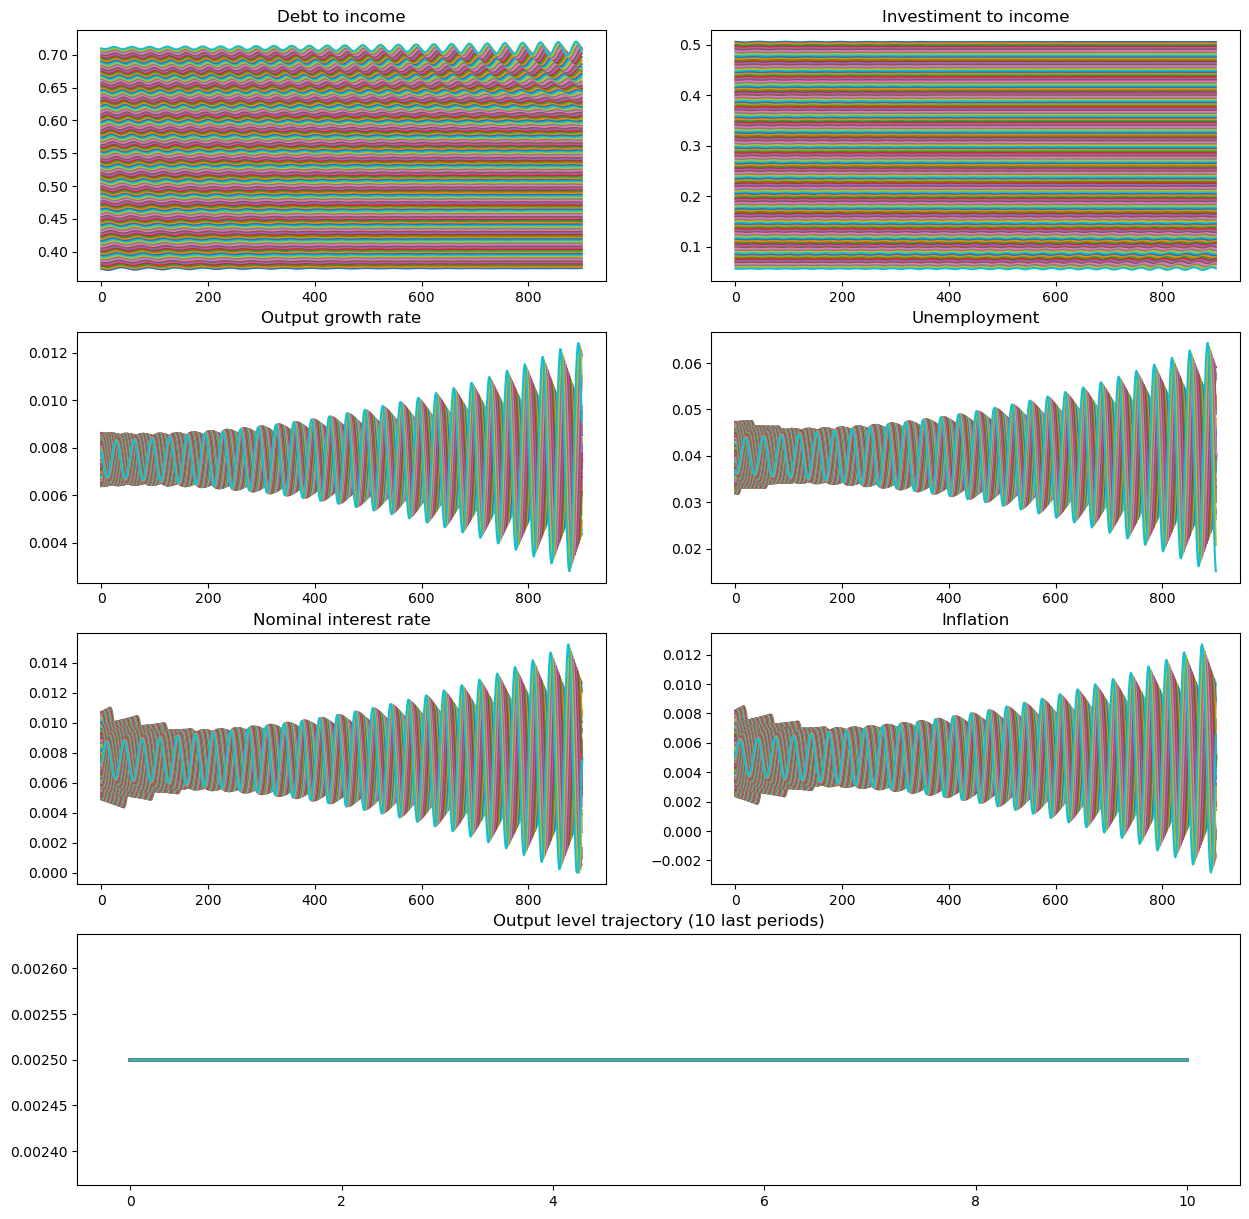

In [9]:
#Parametric/shock exploration

#remeber initial values: nI=0.15  ,nII=0.35, u_star=0.04  , sigmaI=0.05  , sigmaII=0.15, omega=0.8, tau=0.0075, 
#                        r_star=0.0025, pi_star=0.005, beta1=0.5, beta2=0.5 

############################################################################################################################
################################################  USER CHOICES  ############################################################

parameter = 5    #Choose the number of the parameter to be perturbed, recall the order is the array of the parameters 
                 # if parameter =0 nI is disturbed, if =1 -> nII, 2 -> u_star, 3 ->sigmaI, 4 ->sigmaII, 5 -> omega,
                 # 6-> tau, 7-> r_star, 8 -> pi_star, 9 ->beta1, 10->beta2 11 -> gamma, 12 -> phi. 
                 #Recall also that by definition omega = phi*lambdaI + (1-phi)*lambdaII

perct = 0.024     #Choose the size of the shock in investment

nperiods = 900    #Choose the number of periods to be simulated

delay = 5         #Number of time lags of the monatary policy max(5)

mrtype = 4        #Chose the variable targetted by the monetary authority; 0 = equilibrium level of output target,
                  # 1 = equilibrium output growth rate target, 2 = equilibrium employment level target, 3 = full employment

ttr = 0           #if =1 inflation in the monetary rule is an average of the 4 last ones (Taylor 1993), if =0 is just the current inflation

smooth = 1
############################################  PARAMETRIC SET OF CHOICES  ####################################################


nsims = 150              #number of different economies to be simulated min(1)
perturbation = 0.003    #size of perturbation on the parameter of each different economy (might be negative)
transiency =   200          #transiency period (OPTIONAL)




############################################################################################################################
#############################################################################################################################
#############################################  ITERATOR  FUNCTION  ##########################################################

output = np.zeros((transiency+nperiods+1,20,1))  #preallocating final array to store all the results

paramvalues = np.zeros(nsims)  #Preallocating the value to store the simulated parameters (graph of bifurcation)
localparam = np.array((param)) #Preallocating array of parameters to be iterated

for j in range(nsims):
  
    results = np.array(arguments(localparam)) #Array to store results
    localargs = np.array(arguments(localparam)) #Initial condition to be iterated over
    
    shock = perct*localargs[3]
    shock_u = -u_star*(shock/(1+tau))
    
    localargs[3] = localargs[3]+shock
    localargs[4] = localargs[4]+shock #shock is transferred to output the same period because of the time specification of the model
    localargs[5] = localargs[5]+shock_u
    k=0  #Iteration counter set to zero when we start the outter loop to begin a new simulation for a different economy
    #print(f'The first value for your parameter was = {localparam[parameter]}')
    for k in range(nperiods+transiency): #Number of periods simulated
        localargs = f1(localargs,localparam,k,mrtype)
        results = np.vstack((results,localargs))
   
    output = np.dstack((output,results))                #Storing results of each initial state
    
    paramvalues[j] = localparam[parameter]              #Saving the values of parameter used
    localparam[parameter] = localparam[parameter] + perturbation    #Updating the parameter
    
print(f'The first value for your parameter was = {param[parameter]} the last was = {localparam[parameter]}')
graphs2(output,transiency)


CELL #12 - This script plots the phase diagram for the last script ran, should be used carefully if combined with parametric variation through cell 11 

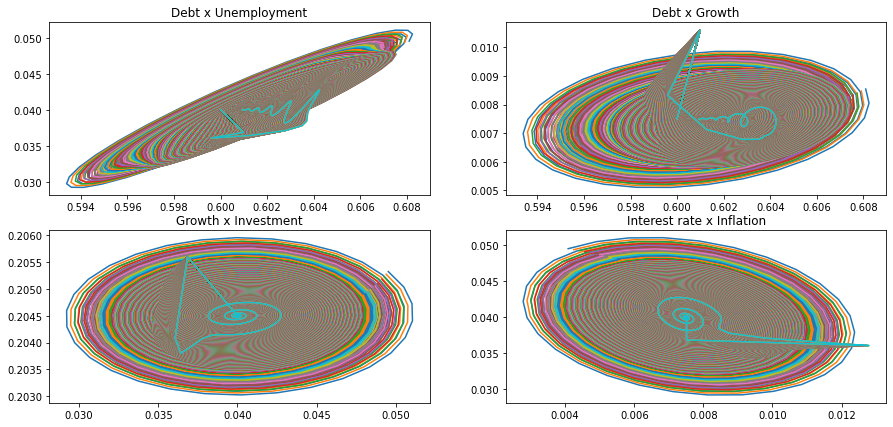

In [1584]:
#Plotting phase diagrams - Not very informative if you are varying parameters through cell 11

def phased():
    pdiagram, dia = plt.subplots(2,2,figsize=(15, 7))
    dia[0,0].plot(output[transiency:transiency+nperiods,0,1:],output[transiency:transiency+nperiods,5,1:]) #debt x Unemployment
    dia[0,0].set_title('Debt x Unemployment')
    dia[0,1].plot(output[transiency:transiency+nperiods,0,1:],output[transiency:transiency+nperiods,4,1:]) #debt x Growth
    dia[0,1].set_title('Debt x Growth')
    dia[1,0].plot(output[transiency:transiency+nperiods,5,1:],output[transiency:transiency+nperiods,3,1:]) #Unemployment x Investment
    dia[1,0].set_title('Growth x Investment')
    dia[1,1].plot(output[transiency:transiency+nperiods,1,1:],output[transiency:transiency+nperiods,5,1:]) #Int. rate x Unemployment
    dia[1,1].set_title('Interest rate x Inflation')
    return

phased()

CELL #13 - Bifurcation diagrams, this funciton might be called in any cell after run it once. It will also display bifurcation diagrams below

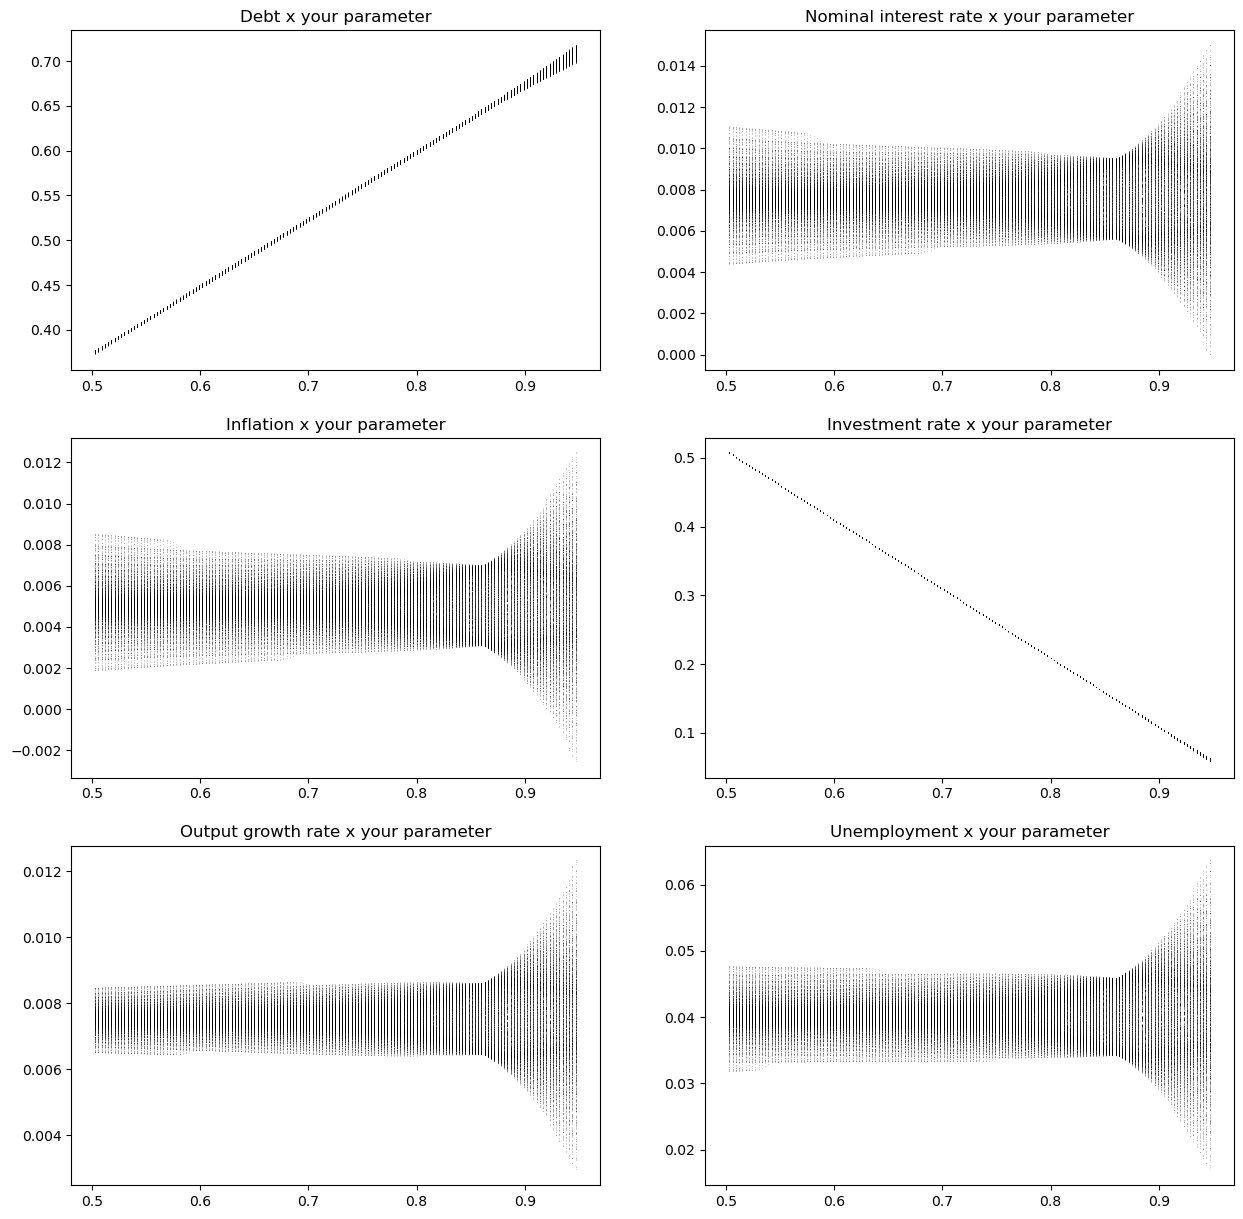

In [10]:
bif, x = plt.subplots(3,2,figsize=(15,15))
for i in range(transiency,transiency+nperiods):
    
    x1 = output[i,0,range(1,nsims)]
    x[0,0].plot(paramvalues[1:], x1, ',k', alpha=0.2)
    x[0,0].set_title('Debt x your parameter')
   
    x2 = output[i,1,range(1,nsims)]
    x[0,1].plot(paramvalues[1:], x2, ',k', alpha=0.2)
    x[0,1].set_title('Nominal interest rate x your parameter')
    
    x3 = output[i,2,range(1,nsims)]
    x[1,0].plot(paramvalues[1:], x3, ',k', alpha=0.2)
    x[1,0].set_title('Inflation x your parameter')
    
    x4 = output[i,3,range(1,nsims)]
    x[1,1].plot(paramvalues[1:], x4, ',k', alpha=0.2)
    x[1,1].set_title('Investment rate x your parameter')
    
    x5 = output[i,4,range(1,nsims)]
    x[2,0].plot(paramvalues[1:], x5, ',k', alpha=.2)
    x[2,0].set_title('Output growth rate x your parameter')
    
    x6 = output[i,5,range(1,nsims)]
    x[2,1].plot(paramvalues[1:], x6, ',k', alpha=0.2)
    x[2,1].set_title('Unemployment x your parameter')
        

# Do not consider cells after this line

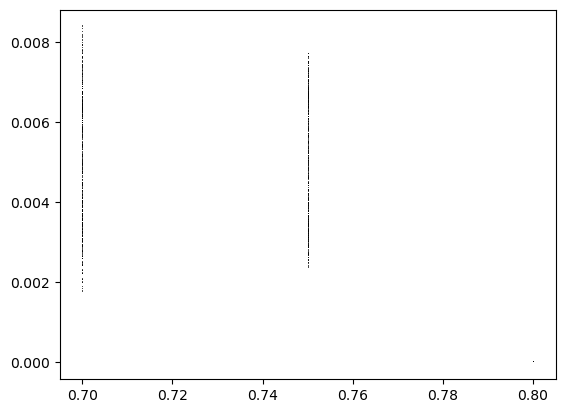

In [25]:


for i in range(transiency,transiency+nperiods):
      
    x5 = output[i,2,range(nsims)]
    plt.plot(paramvalues, x5, ',k', alpha=0.7)
    


    

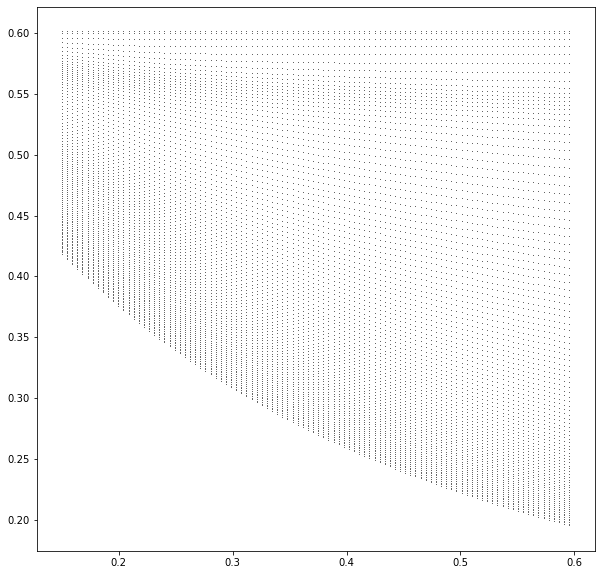

In [2450]:
per = np.linspace(1,nperiods,nperiods)
val = output[:,2,1]
par = paramvalues

a = plt.figure(figsize=(10, 10))
plt.plot(paramvalues2, np.transpose(final[1:,0,1,1:]), ',k', alpha=0.6)

plt.show()


In [41]:
import matplotlib.colors as colors

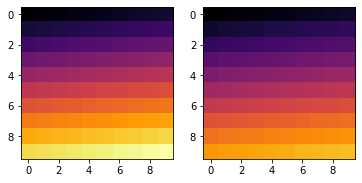

In [42]:

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('inferno')
new_cmap = truncate_colormap(cmap, 0, 0.85)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()


ValueError: 'c' argument has 490000 elements, which is inconsistent with 'x' and 'y' with size 205455.

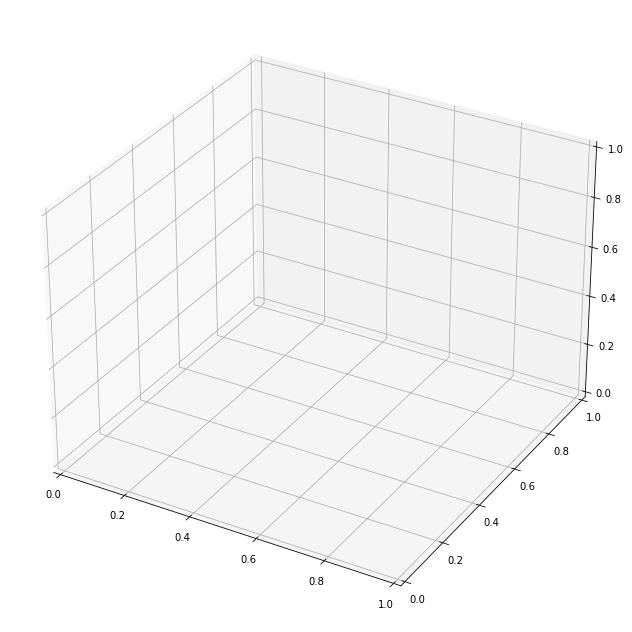

In [343]:

x = np.array(paramvalues1[1:])
y = np.array(paramvalues2)
z = np.linspace(0, 1, nperiods)


X, Y, Z = np.meshgrid(x,y,z)
U1 = np.transpose(final[1+transiency:,0,2:,1:])
U2 = np.transpose(final[1+transiency:,2,2:,1:])
#U3 = np.transpose(final[1+transiency:,3,1:,1:])
U4 = np.transpose(final[1+transiency:,4,2:,1:])
U5 = np.transpose(final[1+transiency:,5,2:,1:])


fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(221, projection='3d')
ax.set_zlim([0, 1])
ax.scatter3D(X, Y, U1,',k', alpha=0.1, s=0.03, c=X, cmap=new_cmap)
ax.view_init(15, 65)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Debt')

bx = fig.add_subplot(222, projection='3d')
bx.set_zlim([-0.05, 0.02])
bx.scatter3D(X, Y, U2,',k', alpha=0.1, s=0.15, c=X, cmap=new_cmap)
bx.view_init(15, 75)
bx.set_xlabel('x')
bx.set_ylabel('y')
bx.set_zlabel('z');
bx.set_title('Inflation')

ax = fig.add_subplot(223, projection='3d')
ax.set_zlim([-0.02, 0.015])
ax.scatter3D(X, Y, U4,',k', alpha=0.07, s=0.15, c=X, cmap=new_cmap)
ax.view_init(15, 75)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Output')

ax = fig.add_subplot(224, projection='3d')
ax.set_zlim([-0.05, 0.10])
ax.scatter3D(X, Y, U5,',k', alpha=0.05, s=0.15, c=X, cmap=new_cmap)
ax.view_init(15, 75)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Unemployment')

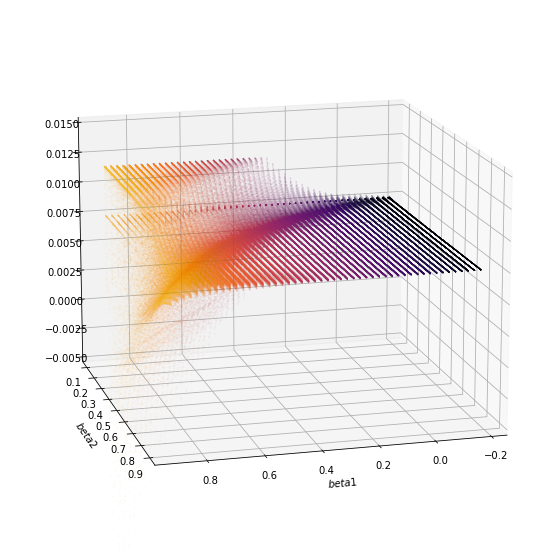

In [126]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes( projection='3d')
ax.set_zlim([-0.005, 0.015])
ax.scatter3D(X, Y, U4,',k', alpha=0.075, s=0.09, c=X, cmap=new_cmap)
ax.view_init(15, 75)
ax.set_xlabel('$beta 1 $')
ax.set_ylabel('$beta 2 $')
ax.set_zlabel('');

In [1125]:
##SUPPLY SHOCK

Statistics

Output level at last period [ 0.00239747  0.00257809  0.00146081  0.0015447   0.00283057  0.0034459
  0.00314064  0.00280688  0.00158112  0.00359299  0.00371648  0.00116
  0.001914    0.00414297  0.00257935  0.0028988   0.00185761  0.00294948
  0.00293343  0.00193357  0.00283922  0.00163344  0.00115766  0.00274673
  0.00276602  0.00230475  0.00307799  0.00348477  0.00152375  0.00234668
  0.00280672  0.00233356  0.00440338  0.00251964  0.00336527  0.00225969
  0.00456266  0.00328862  0.00273897  0.00320122  0.00221149  0.00177888
  0.00309089  0.00334638  0.00272908  0.00372244  0.00303056  0.00151559
  0.00439469  0.00296001  0.00229066  0.00367417  0.00374754 -0.00029921
  0.00240213  0.00259614  0.00114366  0.00191343  0.00141872  0.00160838
  0.00326306  0.00296463  0.00186122  0.00276132  0.00217786  0.00114716
  0.00300631  0.00140244  0.0007478   0.00354811  0.0029317   0.00373561
  0.00236112  0.00394905  0.00317665  0.00137083  0.00341587  0.00240402
  0.00105757  0

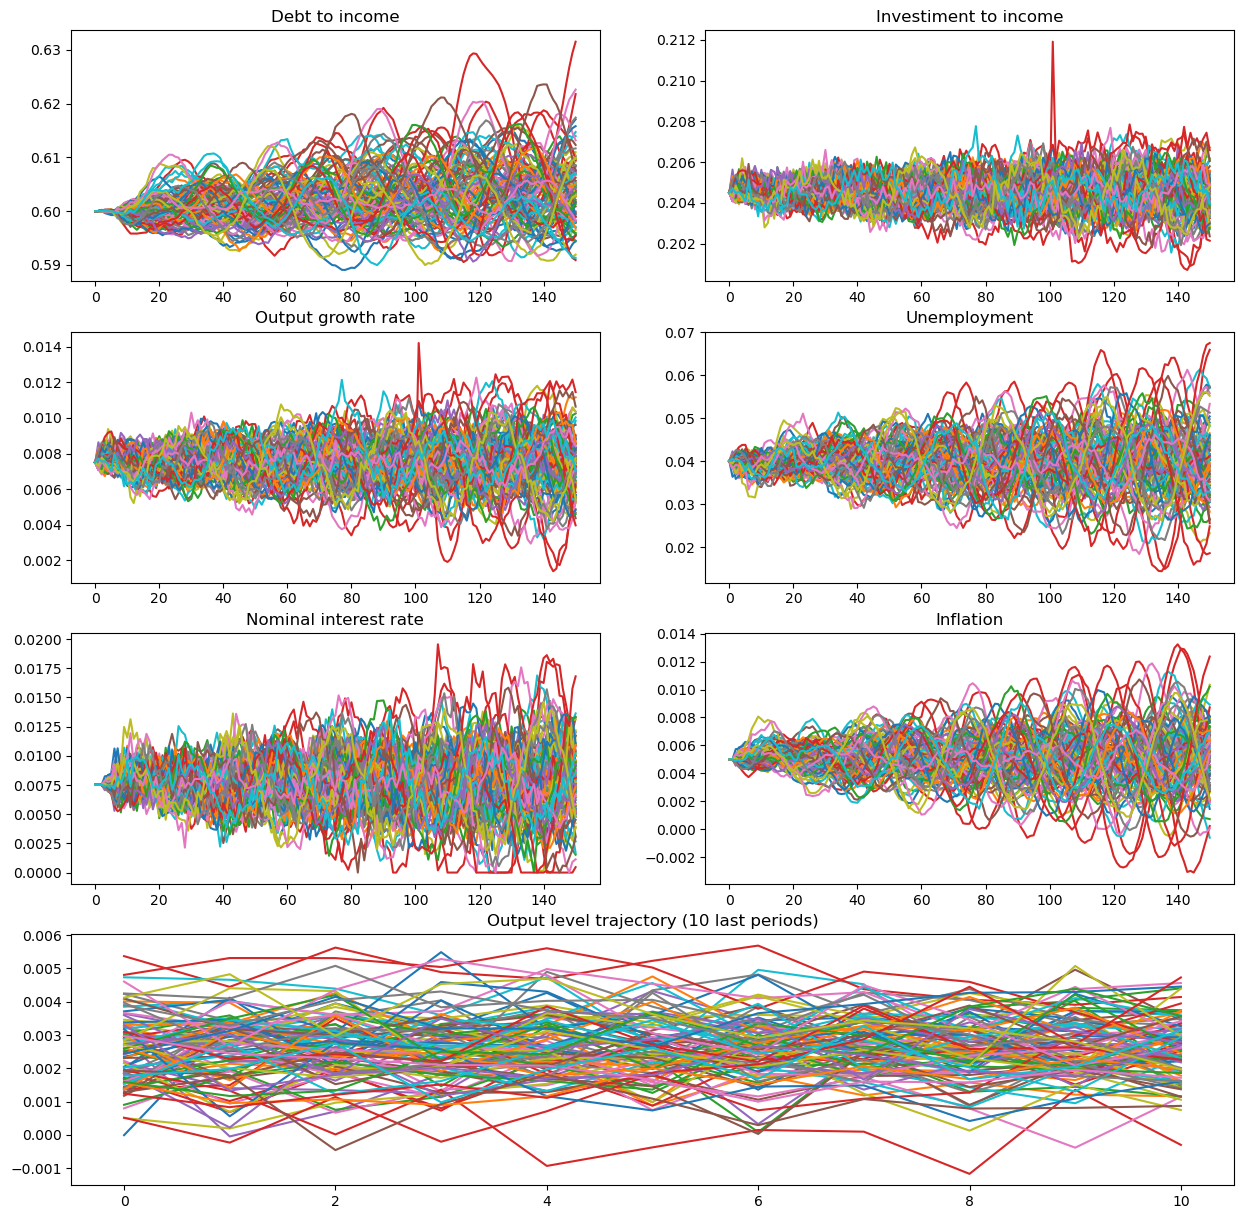

In [86]:
#Parametric/shock exploration AR(1) process (SUPPLY)

#remeber initial values: nI=0.15  ,nII=0.35, u_star=0.04  , sigmaI=0.05  , sigmaII=0.15, omega=0.8, tau=0.0075, 
#                        r_star=0.0025, pi_star=0.005, beta1=0.5, beta2=0.5 

############################################################################################################################
################################################  USER CHOICES  ############################################################
np.random.seed(1)

parameter = 6    #Choose the number of the parameter to be perturbed, recall the order is the array of the parameters 
                 # if parameter =0 nI is disturbed, if =1 -> nII, 2 -> u_star, 3 ->sigmaI, 4 ->sigmaII, 5 -> omega,
                 # 6-> tau, 7-> r_star, 8 -> pi_star, 9 ->beta1, 10->beta2 11 -> gamma, 12 -> phi. 
                 #Recall also that by definition omega = phi*lambdaI + (1-phi)*lambdaII

shock = 0.00     #Choose the size of the shock in investment

nperiods = 150    #Choose the number of periods to be simulated

delay = 5         #Number of time lags of the monatary policy max(5)

mrtype =  1       #Chose the variable targetted by the monetary authority; 0 = equilibrium level of output target,
                  # 1 = equilibrium output growth rate target, 2 = equilibrium employment level target, 3 = full employment

ttr = 0           #if =1 inflation in the monetary rule is an average of the 4 last ones (Taylor 1993), if =0 is just the current inflation

smooth = 0
############################################  PARAMETRIC SET OF CHOICES  ####################################################



nsims = 100               #number of different economies to be simulated min(1)
perturbation = 0.00     #size of perturbation on the parameter of each different economy (might be negative)
transiency =   0          #transiency period (OPTIONAL)
rho = 0



############################################################################################################################
#############################################################################################################################
#############################################  ITERATOR  FUNCTION  ##########################################################

output = np.zeros((transiency+nperiods+1,20,1))  #preallocating final array to store all the results
shock_u = -u_star*(shock/(1+tau))
paramvalues = np.zeros(nsims)  #Preallocating the value to store the simulated parameters (graph of bifurcation)
localparam = np.array((param)) #Preallocating array of parameters to be iterated
feedparam = np.array(localparam)

for j in range(nsims): #Number of different simulations
    results = np.array(arguments(localparam)) #Array to store results
    
    feedparam[6] = feedparam[6] + perturbation 
    localargs = np.array(arguments(localparam)) #Initial condition to be iterated over
    localargs[3] = localargs[3]+shock
    localargs[4] = localargs[4]+shock #shock is transferred to output the same period because of the time specification of the model
    localargs[5] = localargs[5]+shock_u
    k=0  #Iteration counter set to zero when we start the outter loop to begin a new simulation for a different economy
    
    feedparam1 = np.array(feedparam)
    #print(f'The first value for your parameter was = {feedparam1[parameter]} the last was = {localparam[parameter]}')
    for k in range(nperiods+transiency): #Number of periods simulated
        feedparam1[6] = 0.0075 + np.random.normal(0,0.0013)
        localargs = f1(localargs,feedparam1,k,mrtype)
        results = np.vstack((results,localargs))
            
        #if k>=1:
            #feedparam1 = np.array(localparam)
    output = np.dstack((output,results))                #Storing results of each initial state
    
    #paramvalues[j] = localparam[parameter]              #Saving the values of parameter used
    #localparam[parameter] = localparam[parameter] + perturbation    #Updating the parameter
    

graphs2(output,transiency)

In [87]:
k=4

alpha = output[:,1:6,k]
alpha = np.delete(alpha, 2, 1)
alpha[:, 0] = alpha[:, 0] - alpha[:, 1]
alpha[:, 2] = output[:,19,k]

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\plotting.py:227: RuntimeWarning: invalid value encountered in sqrt
  sig = np.sqrt(stderr[:, j * k + i, j * k + i])


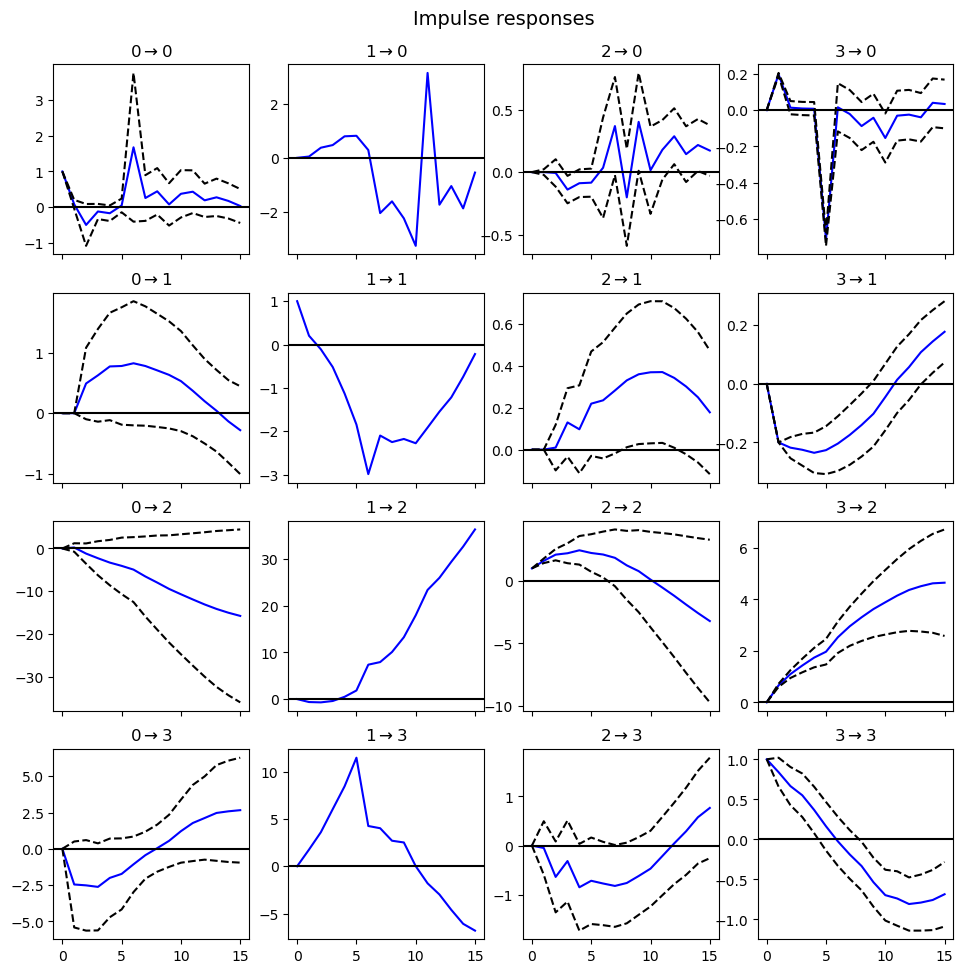

In [89]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Step 1: Generate or load your data
# Let's create a dummy dataset with 5 variables and 100 observations

df = pd.DataFrame(alpha)

# Step 2: Fit the VAR model
model = VAR(df)
results = model.fit(maxlags=15, ic='aic')

# Step 3: Generate impulse response functions
irf = results.irf(15)  # 10 periods

# Step 4: Plot the impulse response functions
irf.plot(orth=False)
plt.show()

In [66]:
meanresult = np.mean(output[nperiods+transiency:,:,:],0)

    
    
print('Statistics')
print()
print(f"Output level at last period {np.mean(output[nperiods+transiency,-1,:])}")
print()

print(f"Debt                   mean = {np.mean(meanresult[0,1:])};  std = {np.std(meanresult[0,1:])/0.0025}")
print(f"Nominal int. rate      mean = {np.mean(((meanresult[1,1:]+1)**4)-1)};  std = {np.std(((meanresult[1,1:]+1)**4)-1)/0.0025}")
print(f"Inflation              mean = {np.mean(((meanresult[2,1:]+1)**4)-1)};  std = {np.std(((meanresult[2,1:]+1)**4)-1)/0.0025}")
print(f"Investment             mean = {np.mean(meanresult[3,1:])};  std = {np.std(meanresult[3,1:])/0.0025}")
print(f"Output growth          mean = {np.mean(((meanresult[4,1:]+1)**4)-1)};  std = {np.std(((meanresult[4,1:]+1)**4)-1)/0.0025}")
print(f"Unemployment           mean = {np.mean(meanresult[5,1:])};  std = {np.std(meanresult[5,1:])/0.0025}")
    

Statistics

Output level at last period 3.0428655986788495

Debt                   mean = 0.6038481213136454;  std = 1.7857012100992293
Nominal int. rate      mean = 0.031152953699687815;  std = 2.6280090765407436
Inflation              mean = 0.02066749054004374;  std = 1.7872856327203808
Investment             mean = 0.20446154855179952;  std = 0.23303995528597812
Output growth          mean = 0.03010145644803701;  std = 1.442105337081807
Unemployment           mean = 0.04010429917091704;  std = 1.5799208351010274


In [429]:
meanresult = np.mean(output[nperiods+transiency:,:,:],0)

    
    
print('Statistics')
print()
print(f"Output level at last period {np.mean(output[nperiods+transiency,-1,:])}")
print()

print(f"Debt                   mean = {np.mean(meanresult[0,1:])};  std = {np.std(meanresult[0,1:])/0.0025}")
print(f"Nominal int. rate      mean = {np.mean(((meanresult[1,1:]+1)**4)-1)};  std = {np.std(((meanresult[1,1:]+1)**4)-1)/0.0025}")
print(f"Inflation              mean = {np.mean(((meanresult[2,1:]+1)**4)-1)};  std = {np.std(((meanresult[2,1:]+1)**4)-1)/0.0025}")
print(f"Investment             mean = {np.mean(meanresult[3,1:])};  std = {np.std(meanresult[3,1:])/0.0025}")
print(f"Output growth          mean = {np.mean(((meanresult[4,1:]+1)**4)-1)};  std = {np.std(((meanresult[4,1:]+1)**4)-1)/0.0025}")
print(f"Unemployment           mean = {np.mean(meanresult[5,1:])};  std = {np.std(meanresult[5,1:])/0.0025}")
    

Statistics

Output level at last period 2.0926001789046045

Debt                   mean = 0.6011741051024315;  std = 1.0171362594863456
Nominal int. rate      mean = 0.031203320260945175;  std = 2.002353431809873
Inflation              mean = 0.020768743612665074;  std = 1.7265535315551503
Investment             mean = 0.20445387178204652;  std = 0.23016849419136906
Output growth          mean = 0.03012457363776786;  std = 1.3958631572368558
Unemployment           mean = 0.04009889320812974;  std = 1.305711359764236


In [1956]:
print(output.shape)

(101, 17, 51)


In [1957]:
meanresult = np.zeros_like(output[1,:,:])
print(meanresult.shape)

(17, 51)


In [302]:
matrixd = np.random.random((3,3,3))
for x in range(3):
    for y in range(3):
        for z in range(3):
            matrixd[x][y][z] = int(matrixd[x][y][z]*10)
        
matrixd

array([[[4., 9., 2.],
        [0., 9., 3.],
        [4., 1., 4.]],

       [[4., 0., 9.],
        [9., 3., 2.],
        [4., 4., 5.]],

       [[6., 2., 1.],
        [9., 5., 6.],
        [6., 3., 0.]]])

In [306]:
matrixd +1

array([[[ 5., 10.,  3.],
        [ 1., 10.,  4.],
        [ 5.,  2.,  5.]],

       [[ 5.,  1., 10.],
        [10.,  4.,  3.],
        [ 5.,  5.,  6.]],

       [[ 7.,  3.,  2.],
        [10.,  6.,  7.],
        [ 7.,  4.,  1.]]])

In [25]:
0.005/0.2045

0.02444987775061125

ValueError: x and y must have same first dimension, but have shapes (99,) and (401, 99)

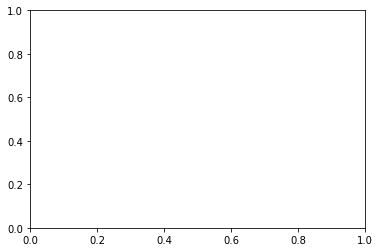

In [2044]:
x1 = output[:,0,range(1,nsims)]
plt.plot(paramvalues[1:], x1, ',k', alpha=0.2)

In [2091]:
#2d bifurcation

In [51]:
#Parametric/shock exploration

#remeber initial values: nI=0.15  ,nII=0.35, u_star=0.04  , sigmaI=0.05  , sigmaII=0.15, omega=0.8, tau=0.0075, 
#                        r_star=0.0025, pi_star=0.005, beta1=0.5, beta2=0.5 

############################################################################################################################
################################################  USER CHOICES  ############################################################

parameter1 = 9    #Choose the number of the parameter to be perturbed, recall the order is the array of the parameters 
parameter2 = 10   # if parameter =0 nI is disturbed, if =1 -> nII, 2 -> u_star, 3 ->sigmaI, 4 ->sigmaII, 5 -> omega,
                  # 6-> tau, 7-> r_star, 8 -> pi_star, 9 ->beta1, 10->beta2 11 -> gamma, 12 -> phi. 
                  #Recall also that by definition omega = phi*lambdaI + (1-phi)*lambdaII

shock = 0.005     #Choose the size of the shock in investment

nperiods = 100    #Choose the number of periods to be simulated

delay = 1         #Number of time lags of the monatary policy max(5)

mrtype = 5        #Chose the variable targetted by the monetary authority; 0 = equilibrium level of output target,
                  # 1 = equilibrium output growth rate target, 2 = equilibrium employment level target, 3 = full employment

ttr = 0           #if =1 inflation in the monetary rule is an average of the 4 last ones (Taylor 1993), if =0 is just the current inflation

smooth = 0
############################################  PARAMETRIC SET OF CHOICES  ####################################################


nsims = 100              #number of different economies to be simulated min(1)
#grid2 = 100              #number of points in grid 2

perturbation = 0.0045     #size of perturbation on the parameter of each different economy (might be negative)
transiency = 100          #transiency period (OPTIONAL)
nsims1 = 50



############################################################################################################################
#############################################################################################################################
#############################################  ITERATOR  FUNCTION  ##########################################################


shock_u = -u_star*(shock/(1+tau))
paramvalues1 = np.zeros(nsims1)  #Preallocating the value to store the simulated parameters (graph of bifurcation)
paramvalues2 = np.linspace(0.1,0.9,nsims)
localparam = np.array((param)) #Preallocating array of parameters to be iterated

final = np.zeros((transiency+nperiods+1,17,nsims1+1,1))

for i in range(nsims):
    
    output = np.zeros((transiency+nperiods+1,17,1))  #preallocating final array to store all the results
    
    paramvalues1 = np.linspace(-0.2,0.9,nsims1)
    localparam[parameter1] = param[parameter1]
    for j in range(nsims1):
        results = np.array(ak) #Array to store results
        localargs = np.array(ak) #Initial condition to be iterated over
        localargs[3] = localargs[3]+shock
        localargs[4] = localargs[4]+shock #shock is transferred to output the same period because of the time specification of the model
        localargs[5] = localargs[5]+shock_u
        k=0  #Iteration counter set to zero when we start the outter loop to begin a new simulation for a different economy
        #print(f'The first value for your parameter was = {localparam[parameter]}')
        for k in range(nperiods+transiency): #Number of periods simulated
            localargs = f1(localargs,localparam,k,mrtype)
            results = np.vstack((results,localargs))
    
        results = np.reshape(results,(transiency+nperiods+1,17,1))
        output = np.concatenate((output,results),axis=2)    #Storing results of each initial state
  
        #paramvalues1[j] = localparam[parameter1]              #Saving the values of parameter used
        localparam[parameter1] = paramvalues1[j] #+ perturbation    #Updating the parameter
    
    
    #paramvalues2[i] = localparam[parameter2]
    output = np.reshape(output,(transiency+nperiods+1,17,nsims1+1,1))
    final = np.concatenate((final,output),axis=3)
    localparam[parameter2] = paramvalues2[i] 


#print(f'The first value for your parameter was = {param[parameter]} the last was = {localparam[parameter]}')
#graphs2(output,transiency)


NameError: name 'ak' is not defined

In [2209]:
paramvalues2

array([0.15  , 0.1545, 0.159 , 0.1635, 0.168 , 0.1725, 0.177 , 0.1815,
       0.186 , 0.1905, 0.195 , 0.1995, 0.204 , 0.2085, 0.213 , 0.2175,
       0.222 , 0.2265, 0.231 , 0.2355, 0.24  , 0.2445, 0.249 , 0.2535,
       0.258 , 0.2625, 0.267 , 0.2715, 0.276 , 0.2805, 0.285 , 0.2895,
       0.294 , 0.2985, 0.303 , 0.3075, 0.312 , 0.3165, 0.321 , 0.3255,
       0.33  , 0.3345, 0.339 , 0.3435, 0.348 , 0.3525, 0.357 , 0.3615,
       0.366 , 0.3705])

In [2181]:
output = np.zeros((transiency+nperiods+1,17,1))
output.shape

(101, 17, 1)

In [2205]:
param

array([0.15  , 0.35  , 0.04  , 0.05  , 0.15  , 0.8   , 0.0075, 0.0025,
       0.005 , 0.15  , 0.15  , 0.9   , 0.5   ])

In [2396]:
np.shape(final[1:,0,1:,1:])

(100, 100, 100)

In [2397]:
np.shape(paramvalues1)

(100,)

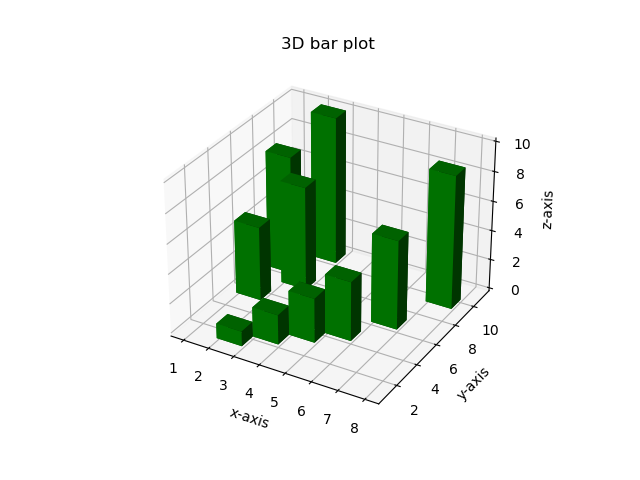

In [34]:

xs = [2, 3, 4, 5, 1, 6, 2, 1, 7, 2]
ys = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
zs = np.zeros(10)
dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
# creating figure
figg = plt.figure()
ax = figg.add_subplot(111, projection='3d')
  
# creating the plot
plot_geeks = ax.bar3d(xs, ys, zs, dx, 
                      dy, dz, color='green')
  
# setting title and labels
ax.set_title("3D bar plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

Text(0.5, 0.92, 'Unemployment')

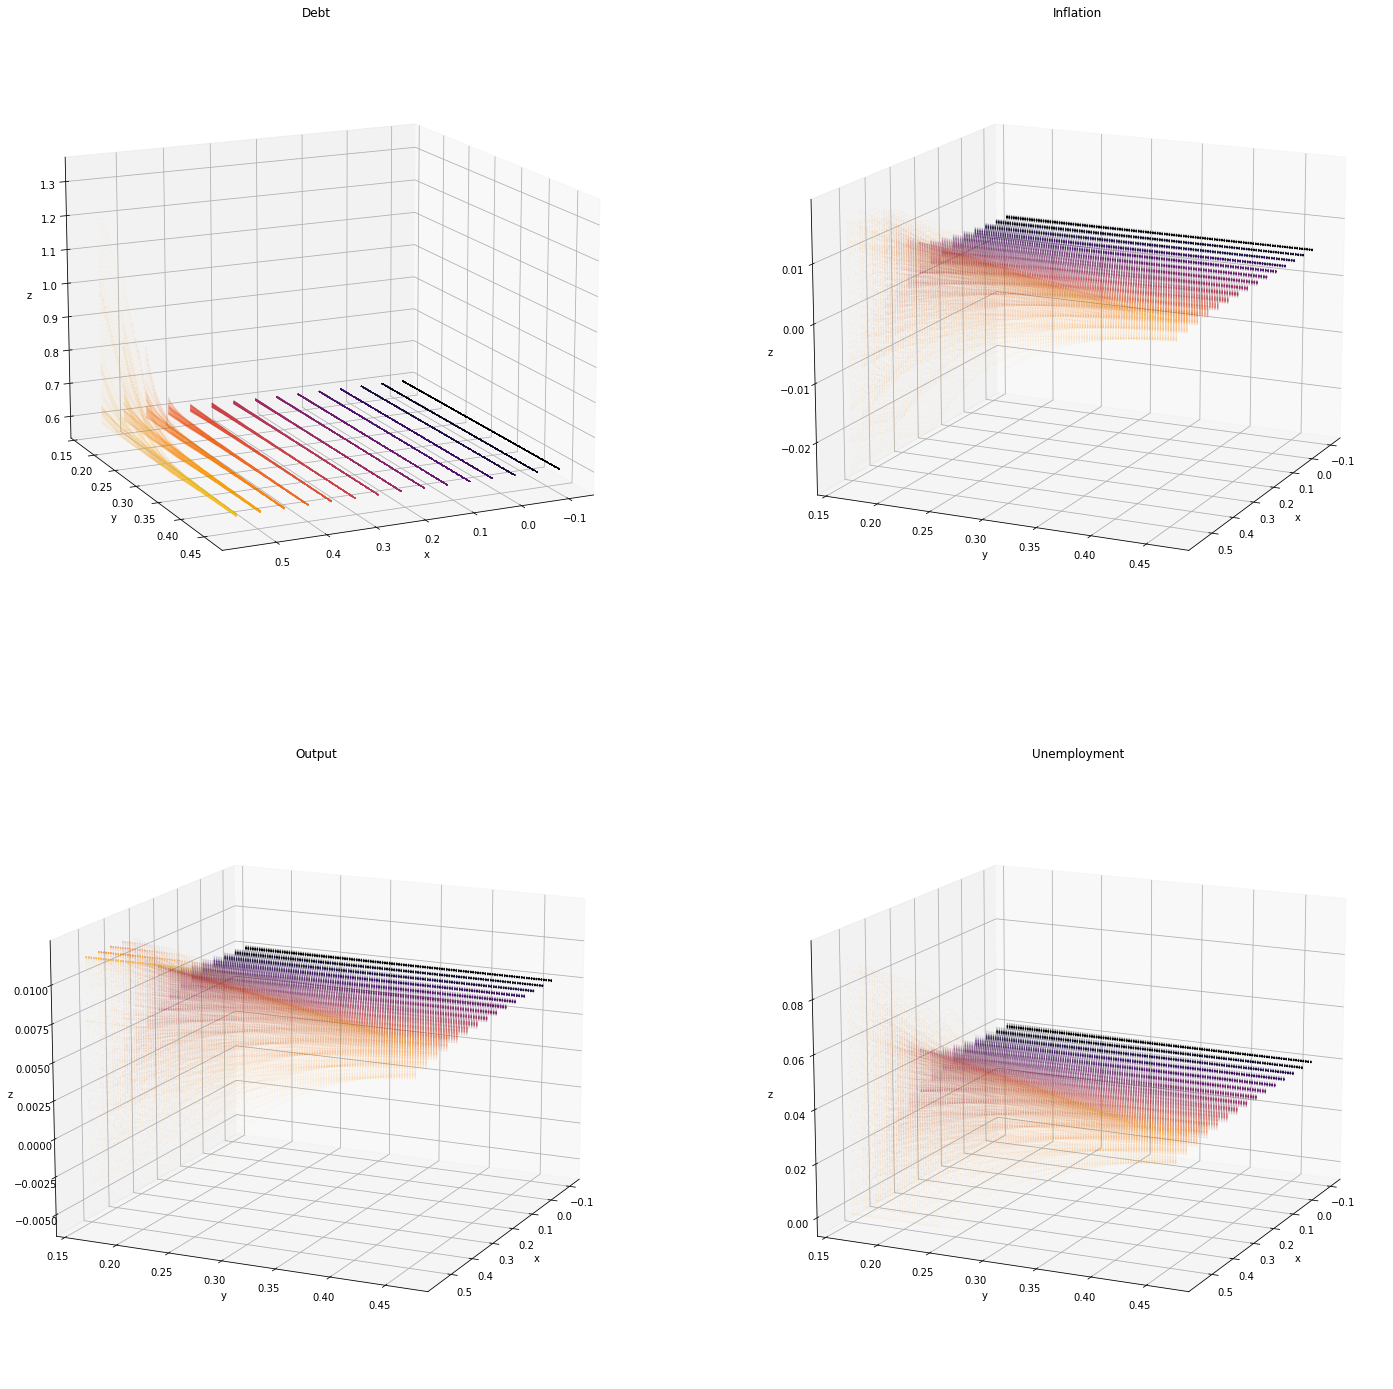

In [158]:

x = np.array(paramvalues1[2:17])
y = np.array(paramvalues2[70:200])
z = np.linspace(0, 1, nperiods)


X, Y, Z = np.meshgrid(x,y,z)
U1 = np.transpose(final[1+transiency:,0,2:17,70:200])
U2 = np.transpose(final[1+transiency:,2,2:17,70:200])
#U3 = np.transpose(final[1+transiency:,3,2:15,1:200])
U4 = np.transpose(final[1+transiency:,4,2:17,70:200])
U5 = np.transpose(final[1+transiency:,5,2:17,70:200])


fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(221, projection='3d')
ax.scatter3D(X, Y, U1,',k', alpha=0.1, s=0.03, c=X, cmap=new_cmap)
ax.view_init(15, 65)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Debt')

ax = fig.add_subplot(222, projection='3d')
ax.scatter3D(X, Y, U2,',k', alpha=0.03, s=0.3, c=X, cmap=new_cmap)
ax.view_init(15, 25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Inflation')

ax = fig.add_subplot(223, projection='3d')
ax.scatter3D(X, Y, U4,',k', alpha=0.03, s=0.3, c=X, cmap=new_cmap)
ax.view_init(15, 25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Output')

ax = fig.add_subplot(224, projection='3d')
ax.scatter3D(X, Y, U5,',k', alpha=0.03, s=0.3, c=X, cmap=new_cmap)
ax.view_init(15, 25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Unemployment')

In [17]:
0.024*localargs[3]

0.004908